In [1]:
pip install sewar

In [2]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
from sewar import full_ref
from skimage import measure, metrics
from skimage.metrics import structural_similarity as ssim

In [3]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
!pip install unrar
!unrar x /content/gdrive/MyDrive/img.rar "/content/temp"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/gdrive/MyDrive/img.rar

No files to extract


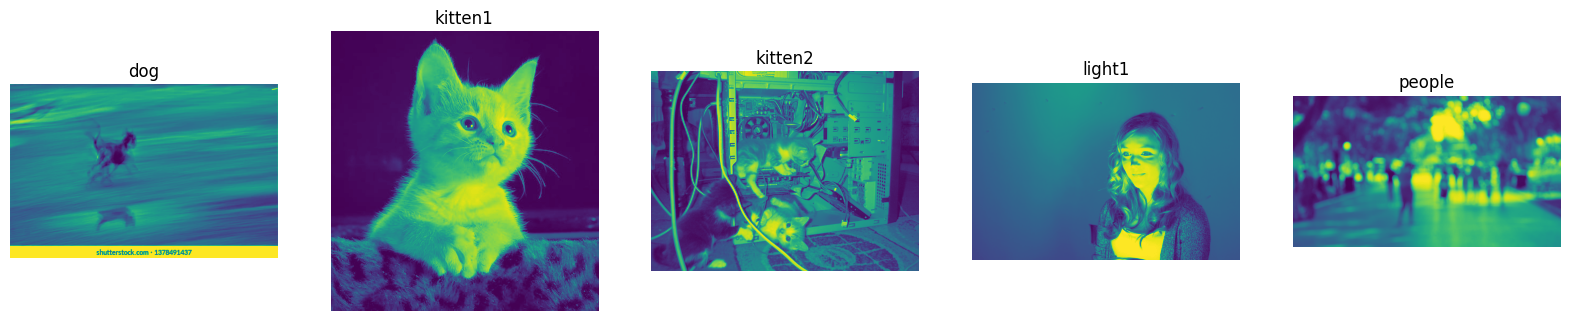

In [5]:
fig = plt.figure(figsize=(20, 33))

rows = 1
columns = 5

img_dog = cv2.imread("img/dog.jpg", 0)             # blurry
img_kitten1 = cv2.imread("img/kitten1.jpeg", 0)    # clear
img_kitten2 = cv2.imread("img/kitten2.jpg", 0)     # clear
img_light1 = cv2.imread("img/light1.jpg", 0)       # bad lighting
img_people = cv2.imread("img/people.jpg", 0)       # blurry

def show_img(img, title, pos):
    fig.add_subplot(rows, columns, pos)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)

show_img(img_dog, "dog", 1)
show_img(img_kitten1, "kitten1", 2)
show_img(img_kitten2, "kitten2", 3)
show_img(img_light1, "light1", 4)
show_img(img_people, "people", 5)

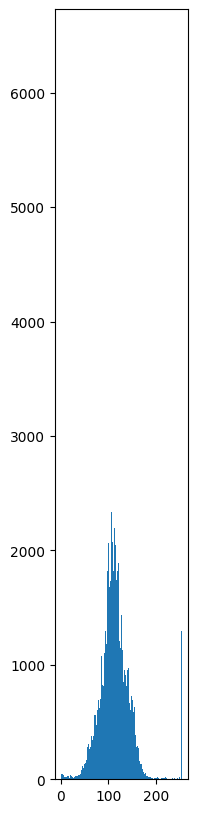

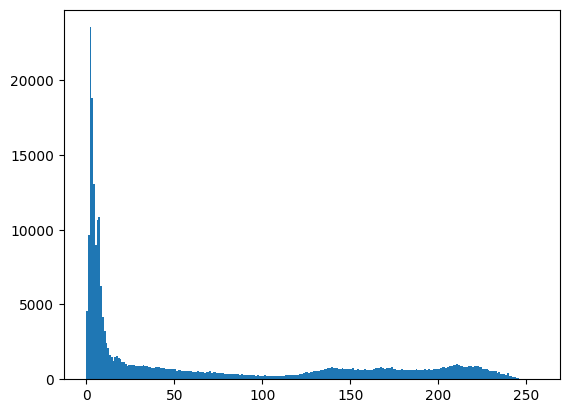

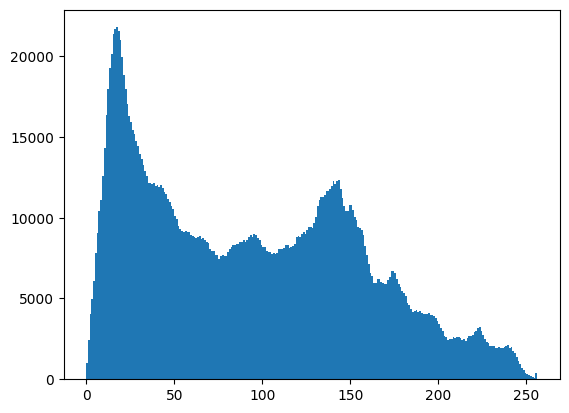

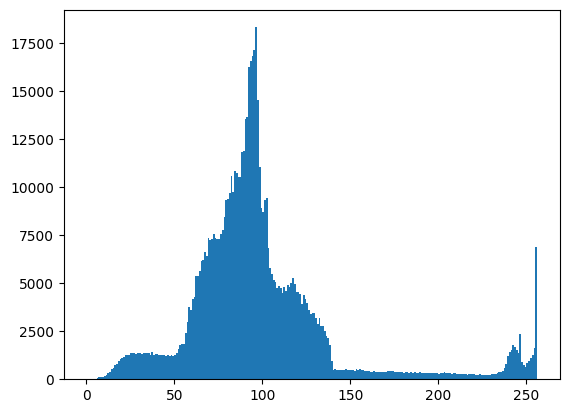

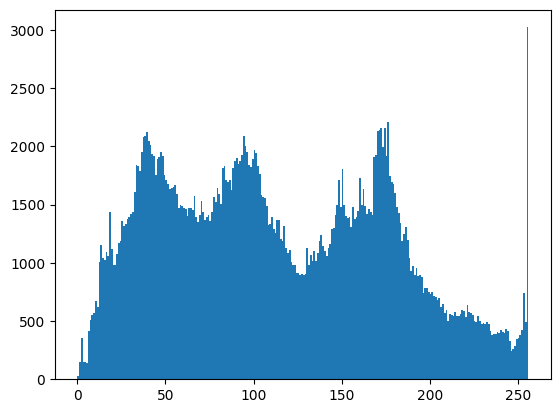

In [6]:
fig = plt.figure(figsize=(10, 10))

def show_plot(img, pos):
    fig.add_subplot(rows, columns, pos)
    pixel_original = np.array([img])
    plt.hist(pixel_original.ravel(), 256, [0, 256])
    plt.show()

show_plot(img_dog, 1)
show_plot(img_kitten1, 2)
show_plot(img_kitten2, 3)
show_plot(img_light1, 4)
show_plot(img_people, 5)

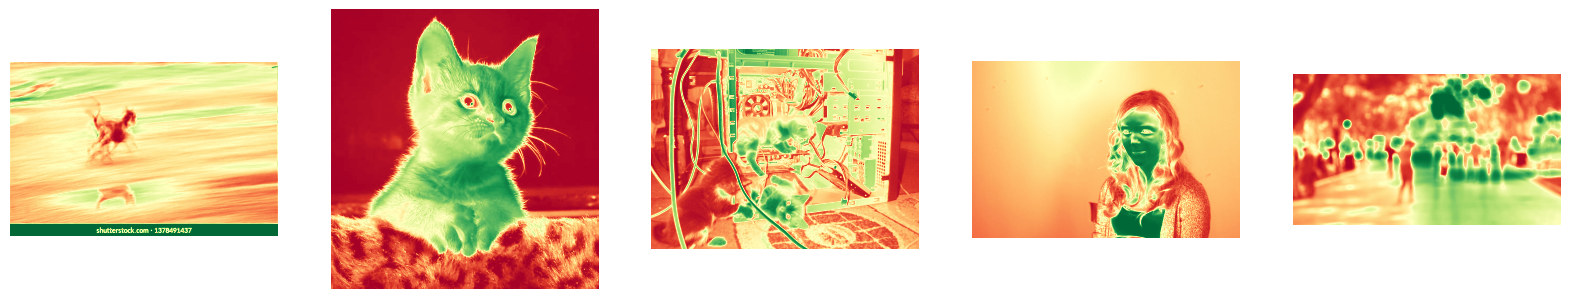

In [7]:
fig = plt.figure(figsize=(20, 33))

def show_colormap(img, pos):
    fig.add_subplot(rows, columns, pos)
    plt.imshow(img, cmap="RdYlGn")
    plt.axis('off')

show_colormap(img_dog, 1)
show_colormap(img_kitten1, 2)
show_colormap(img_kitten2, 3)
show_colormap(img_light1, 4)
show_colormap(img_people, 5)

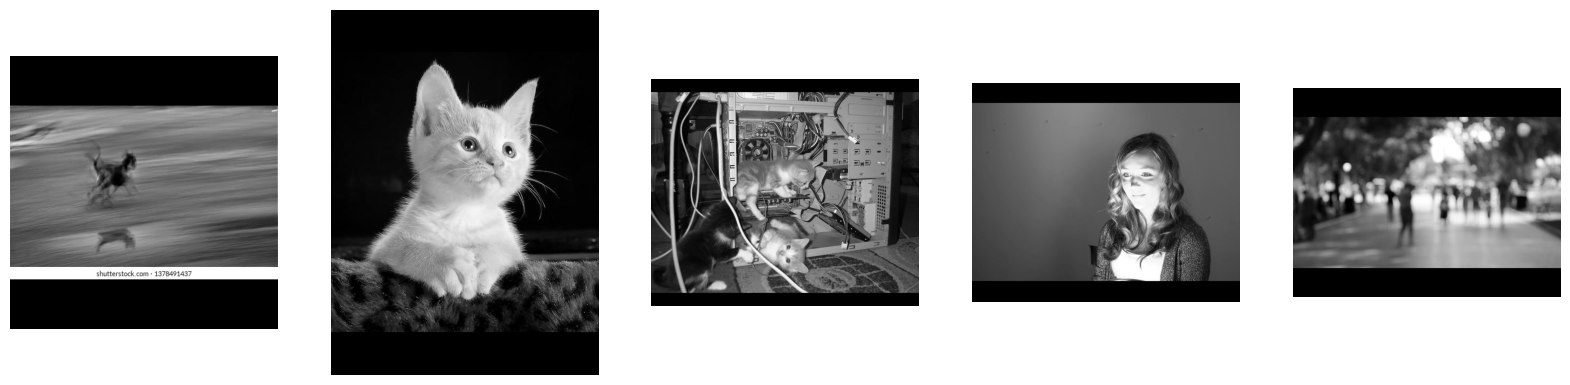

In [8]:
fig = plt.figure(figsize=(20, 33))

def show(img):
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])

def show_gray(img_original, pos):
    fig.add_subplot(rows, columns, pos)
    h, w = img_original.shape
    img = np.zeros((h + 160, w), np.uint8)
    img[80: -80,:] = img_original
    show(img)

show_gray(img_dog, 1)
show_gray(img_kitten1, 2)
show_gray(img_kitten2, 3)
show_gray(img_light1, 4)
show_gray(img_people, 5)

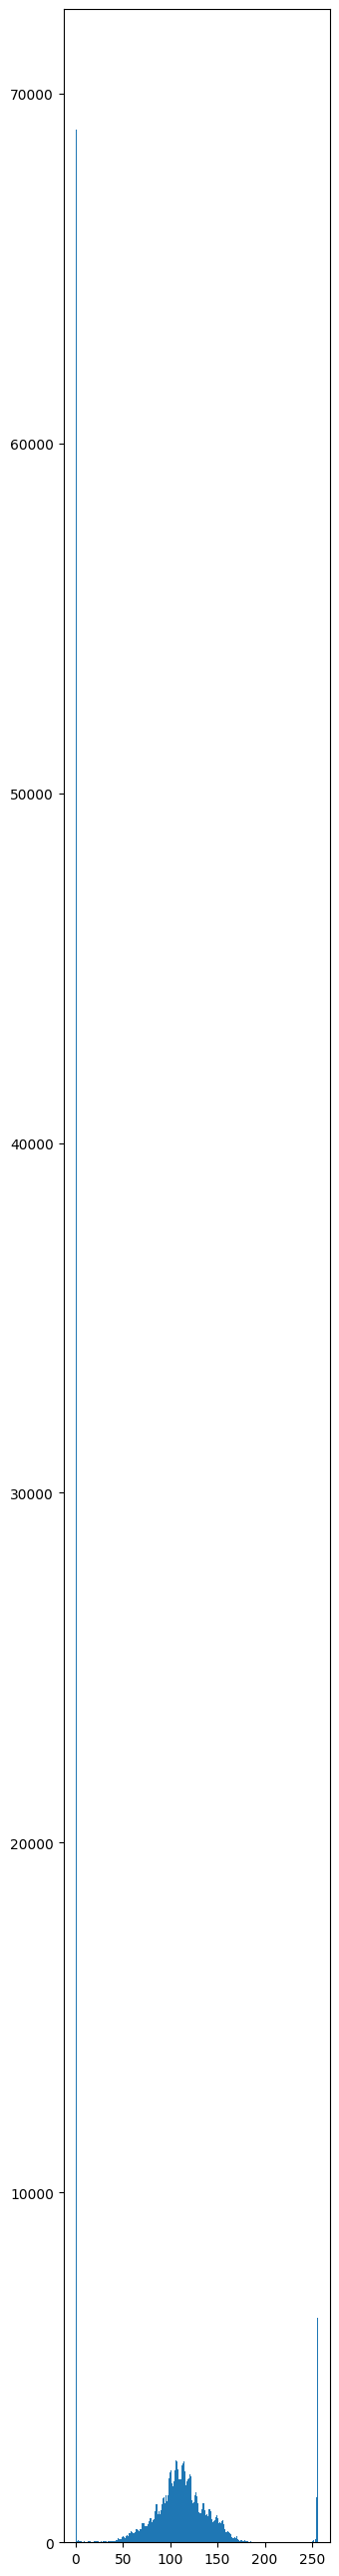

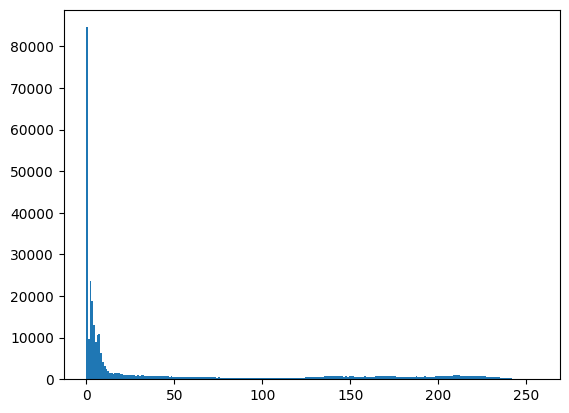

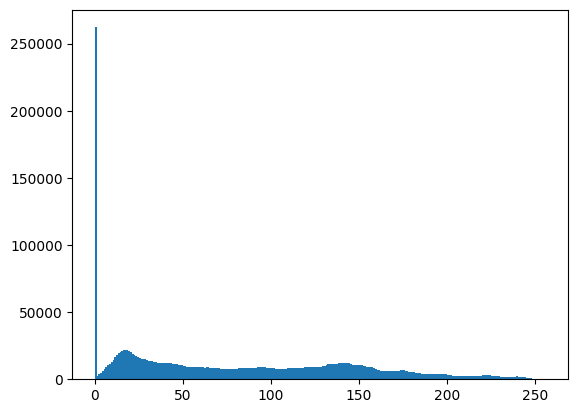

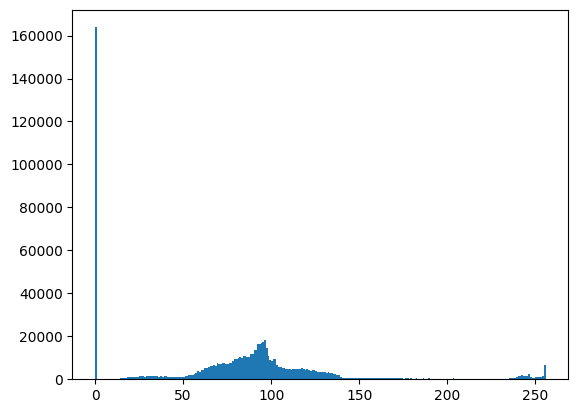

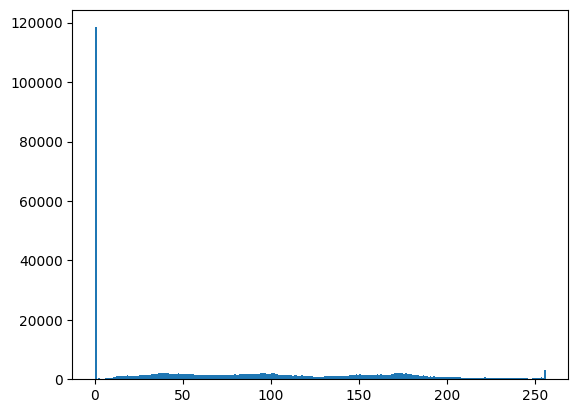

In [9]:
fig = plt.figure(figsize=(20, 33))

def show_plot_gray(img_original, pos):
    fig.add_subplot(rows, columns, pos)
    h, w = img_original.shape
    img = np.zeros((h + 160, w), np.uint8)
    img[80: -80,:] = img_original
    pixel_gray = np.array([img])
    plt.hist(img.ravel(), 256, [0, 256])
    plt.show()

show_plot_gray(img_dog, 1)
show_plot_gray(img_kitten1, 2)
show_plot_gray(img_kitten2, 3)
show_plot_gray(img_light1, 4)
show_plot_gray(img_people, 5)

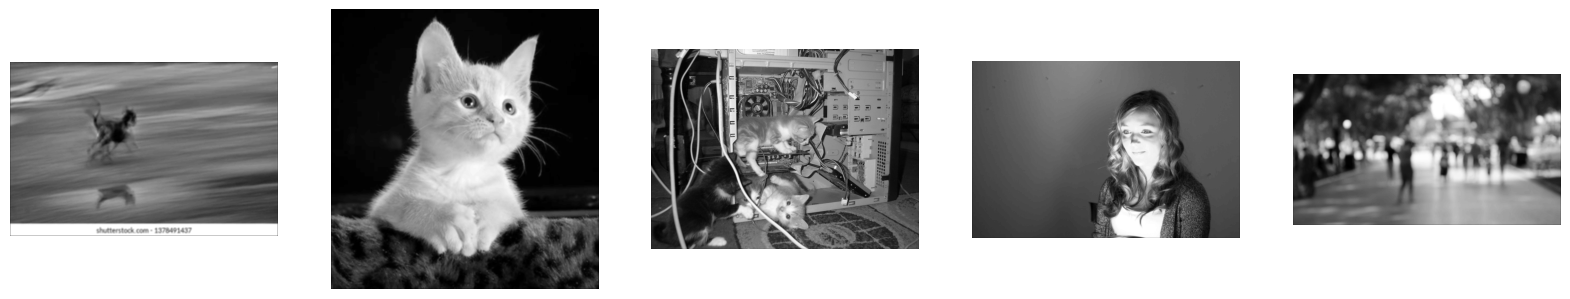

In [10]:
fig = plt.figure(figsize=(20, 33))
mean_kernel = np.ones((3, 3), np.float32) / 25

def show_conv_mean(img, pos):
    fig.add_subplot(rows, columns, pos)
    conv_mean = cv2.filter2D(img, -1, mean_kernel, borderType = cv2.BORDER_CONSTANT)
    show(conv_mean)

show_conv_mean(img_dog, 1)
show_conv_mean(img_kitten1, 2)
show_conv_mean(img_kitten2, 3)
show_conv_mean(img_light1, 4)
show_conv_mean(img_people, 5)

In [11]:
def show_results(img, title):
    conv_mean = cv2.filter2D(img, -1, mean_kernel, borderType = cv2.BORDER_CONSTANT)
    rmse_skimg = metrics.normalized_root_mse(img, conv_mean)
    mse_skimg = metrics.mean_squared_error(img, conv_mean)
    psnr_skimg = metrics.peak_signal_noise_ratio(img, conv_mean, data_range=None)
    ssim_skimg = ssim(img, conv_mean, data_range=img.max()-img.min(), multichannel=True)

    print(f"{title}")
    print(f"RMSE: based on scikit-image = {rmse_skimg}")
    print(f"MSE: based on scikit-image = {mse_skimg}")
    print(f"PSNR: based on scikit-image = {psnr_skimg}")
    print(f"SSIM: based on scikit-image = {ssim_skimg}\n")

show_results(img_dog, "dog")
show_results(img_kitten1, "kitten1")
show_results(img_kitten2, "kitten2")
show_results(img_light1, "light1")
show_results(img_people, "people")

<ipython-input-11-528739dee9df>:6: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_skimg = ssim(img, conv_mean, data_range=img.max()-img.min(), multichannel=True)


dog
RMSE: based on scikit-image = 0.6453259688573213
MSE: based on scikit-image = 6838.3092393105735
PSNR: based on scikit-image = 9.781316244702955
SSIM: based on scikit-image = 0.4870199089997512

kitten1
RMSE: based on scikit-image = 0.6427839209590089
MSE: based on scikit-image = 4729.220608030592
PSNR: based on scikit-image = 11.38290787470865
SSIM: based on scikit-image = 0.5711145307473937

kitten2
RMSE: based on scikit-image = 0.6438313302157425
MSE: based on scikit-image = 5233.206698345188
PSNR: based on scikit-image = 10.943124722627937
SSIM: based on scikit-image = 0.516373777383827

light1
RMSE: based on scikit-image = 0.6426877832044109
MSE: based on scikit-image = 4877.516409122242
PSNR: based on scikit-image = 11.248816217292369
SSIM: based on scikit-image = 0.5713156678502853

people
RMSE: based on scikit-image = 0.6408651160239761
MSE: based on scikit-image = 6979.586631966895
PSNR: based on scikit-image = 9.692506586991666
SSIM: based on scikit-image = 0.577949351931

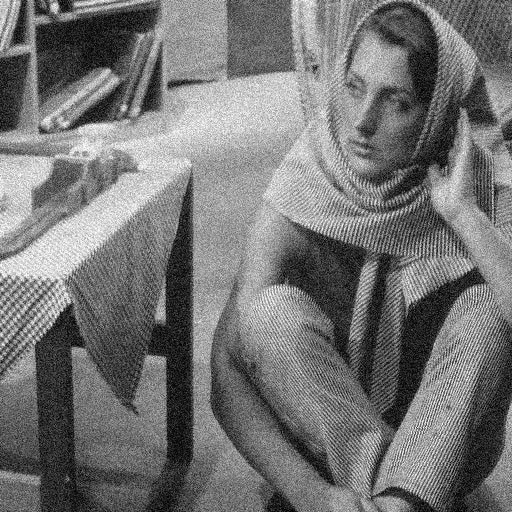

In [12]:
# adaptive median filter
noisy = Image.open("img/1_avDC5lmq6tQLA5FmS_Aa9g.jpg")
def rgb2gray(rgb):
    if(len(rgb.shape) == 3):
        return np.uint8(np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]))
    else:
        return rgb

noisy_image = np.array(noisy)
grayscale_image = rgb2gray(noisy_image)

def calculate_median(array):
    sorted_array = np.sort(array)
    median = sorted_array[len(array)//2]
    return median

def level_A(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_med < z_max):
        return level_B(z_min, z_med, z_max, z_xy, S_xy, S_max)
    else:
        S_xy += 2
        if(S_xy <= S_max):
            return level_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
        else:
            return z_med

def level_B(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_xy < z_max):
        return z_xy
    else:
        return z_med

def amf(image, initial_window, max_window):
    xlength, ylength = image.shape
    z_min, z_med, z_max, z_xy = 0, 0, 0, 0
    S_max = max_window
    S_xy = initial_window
    output_image = image.copy()

    for row in range(S_xy, xlength-S_xy-1):
        for col in range(S_xy, ylength-S_xy-1):
            filter_window = image[row - S_xy : row + S_xy + 1, col - S_xy : col + S_xy + 1] #filter window
            target = filter_window.reshape(-1)
            z_min = np.min(target)
            z_max = np.max(target)
            z_med = calculate_median(target)
            z_xy = image[row, col]
            new_intensity = level_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
            output_image[row, col] = new_intensity
    return output_image

output = amf(grayscale_image, 3, 19)
Image.fromarray(output)

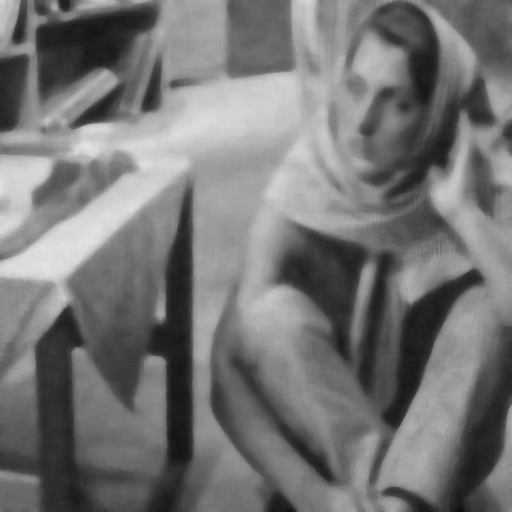

In [13]:
# (standard) median filter
smf_output = noisy.filter(ImageFilter.MedianFilter(size=11))
smf_output

In [19]:
def atm(image):
    img = image.copy()
    height,width = image.shape
    height=height-1
    width=width-1
    a=0
    for i in range(1,height):
        for j in range(1,width):
            arr=[]
            a= image[i-1][j-1]
            arr.append(a)
            a= image[i-1][j]
            arr.append(a)
            a= image[i-1][j+1]
            arr.append(a)
            a= image[i][j-1]
            arr.append(a)
            a= image[i][j]
            arr.append(a)
            a= image[i][j+1]
            arr.append(a)
            a= image[i+1][j-1]
            arr.append(a)
            a= image[i+1][j]
            arr.append(a)
            a= image[i+1][j+1]
            arr.append(a)
            arr=QuickSort(arr)
            leng=len(arr)-1
            middleIndex=int(leng/2)
            total=0
            total+=arr[middleIndex-2]
            total+=arr[middleIndex-1]
            total+=arr[middleIndex]
            total+=arr[middleIndex+1]
            total+=arr[middleIndex+2]
            total=int(total/5)
            img[i][j]=total

    return img

def QuickSort(array):
    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)

        return QuickSort(less)+equal+QuickSort(greater)
    else:
        return array

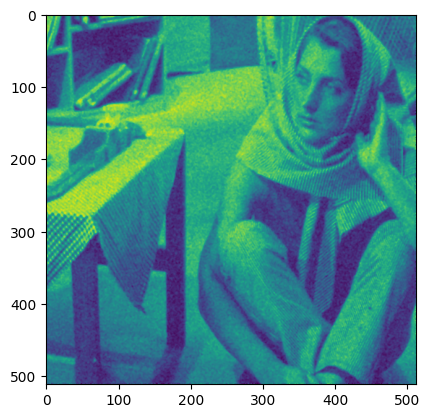

In [21]:
atm_image = atm(cv2.imread("img/1_avDC5lmq6tQLA5FmS_Aa9g.jpg", 0))
plt.imshow(atm_image)